## Problem Statement

You are working in an e-commerce company, and your company has put forward a task to analyze the customer reviews for various products. You are supposed to create a report that classifies the products based on the customer reviews.

## Project Objective

1. Find various trends and patterns in the reviews data, create useful insights that best describe the product quality.
2. Classify each review based on the sentiment associated with the same.

## Data Description

The Reviews.csv dataset contains 60145 rows and 10 columns.

- Id : Record ID
- ProductId : Product ID
- UserId : User ID who posted the review
- ProfileName : Profile name of the User
- HelpfullnessNumerator : Numerator of the helpfulness of the review
- HelpfullnessDenominator : Denominator of the helpfulness of the review
- Score : Product Rating
- Time : Review time in timestamp
- Summary : Summary of the review
- **Text** : Actual text of the review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")


data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reviews.csv',index_col = 'Id')

In [2]:
data.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568454 entries, 1 to 568454
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568438 non-null  object
 3   HelpfulnessNumerator    568454 non-null  int64 
 4   HelpfulnessDenominator  568454 non-null  int64 
 5   Score                   568454 non-null  int64 
 6   Time                    568454 non-null  int64 
 7   Summary                 568427 non-null  object
 8   Text                    568454 non-null  object
dtypes: int64(4), object(5)
memory usage: 43.4+ MB


In [4]:
data.isnull().sum()

ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568411.000000,568411.000000,568411.000000,5.684110e+05
mean,1.743874,2.227876,4.183309,1.296261e+09
std,7.636781,8.288752,1.310368,4.803792e+07
min,0.000000,0.000000,1.000000,9.393408e+08
25%,0.000000,0.000000,4.000000,1.271290e+09
50%,0.000000,1.000000,5.000000,1.311120e+09
75%,2.000000,2.000000,5.000000,1.332720e+09
max,866.000000,923.000000,5.000000,1.351210e+09


In [7]:
data.ProductId.nunique()

74258

In [8]:
data.UserId.nunique()

256047

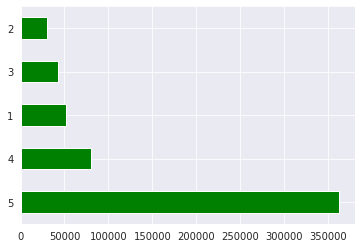

In [9]:
data.Score.value_counts().plot(kind = 'barh',color = 'green')
plt.show()

## Choosing the Algorithm for the Project

In [12]:
!pip install vaderSentiment
!pip install transformers
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 113.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.0 MB/s eta 0:00:00


In [13]:
sen_analyzer = SentimentIntensityAnalyzer()
result = sen_analyzer.polarity_scores(" I love Tea")

In [14]:
result['compound']

0.6369

In [15]:
def sentiment_check(row):
  result = sen_analyzer.polarity_scores(row)

  if result['compound'] >= 0.5:
    return "Positive"
  elif result['compound'] <= -0.5:
    return "Negative"
  else :
    return "Neutral"

In [16]:
data['Vader_sentiment'] = data.Text.apply(sentiment_check)

In [17]:
data.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Vader_sentiment
Id,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Neutral
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive


In [18]:
import os
from transformers import AutoTokenizer, AutoModelForSequenceClassification
os.environ["HF_ENDPOINT"] = "https://huggingface.co"

# Getting the tokenizer
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

# Getting the model
model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [19]:
encoded_text = tokenizer('I am not sad because I ate gajar ka halva', return_tensors='pt')
encoded_text

{'input_ids': tensor([[    0,     8,   155,    46,   573,   153,     8,   760,  2551, 12145,
          1185,  6700,  3715,     2]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

Here the encoded_text is a dictonary which takes in a sequence and converts it inot tensors that are required by the model to predict the sentiment.
- Input_ids are the numerical indices of the tokens in the sequence.
- token_type_ids differentiates the token being from one sequence or many
-attention_mask defines which of the tokens should be paid attention to for classification of the text , for eg if the tokenised tensor is padded than the padding won't have attention of the model

In [20]:
out = model(**encoded_text)
out

SequenceClassifierOutput(loss=None, logits=tensor([[-2.9146,  0.8716,  2.0700]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

Output of the model is a tensor with values for different classes neg,neu,pos which can be cllected using argmax function

In [21]:
out.logits.argmax().item()

2

In [22]:
model.config.id2label[2]

'POS'

The Model has predicted our example sequence to be positive. Which is not true as I did not really ate any halva. ;)

In [23]:
def hugging_face_analyzer(row):
  encoded_text = tokenizer(row, return_tensors='pt',max_length = 128,truncation=True)
  out = model(**encoded_text)
  max_index = out.logits.argmax().item()
  sentiment = model.config.id2label[2]

  if sentiment == 'POS':
    return "Positive"
  elif sentiment == 'NEG':
    return "Negative"
  elif  sentiment == 'NEU':
    return "Neutral"

In [ ]:
data['Hugging_Face_Sentiment'] = data.Text.apply(hugging_face_analyzer)

## Inferences from the Same